<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-kartik1975/blob/master/Introduction_to_NN_Project__Resi_6_Solutions_KK_ver_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Context: Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

1. Steps and Milestones (100%)

2. Setup Environment and Load Necessary Packages (5%)

3. Data Preparation (40%)

4. Loading Data (5%)

5. Cleaning Data (10%)

6. Data Representation & Feature Engineering (If Any) (15%)

7. Creating Train and Validation Set (10%)

8. Model Creation (30%)

9. Write & Configure Model (10%)

10. Compile Model (10%)

11. Build Model & Checking Summary (10%)

12. Training and Evaluation (25%)

13. Run Multiple Experiments (10%)

14. Reason & Visualize Model Performance (5%)

15. Evaluate Model on Test Set (10%)

Learning Outcomes:

a. Neural Networks for Predictive Analytics

b. Fine-tuning Model

c. Data Preparation

d. Feature Engineering

e. Visualization

The points distribution for this case is as follows:

* Read the data set

* Drop the columns which are unique for all users like IDs (2.5 points)

* Distinguish the feature and target set (2.5 points)

* Divide the data set into training and test sets ( 2.5 points)

* Normalize the train and test data (5 points)

* Initialize & build the model (10 points)

* Predict the results using 0.5 as a threshold (5 points)

* Print the Accuracy score and confusion matrix (2.5 points)


In [3]:
pip install scikit-learn==0.22.0

     |████████████████████████████████| 7.0MB 2.8MB/s 
  Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import os
#print(os.listdir("../input"))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the data set**

In [7]:
#importing the dataset

bankdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv', index_col='RowNumber')
bankdata.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [13]:
bankdata.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


High Level Data findings: 
* Age: between 18-92
* Tenure:less then one year to 10 years
* CreditScore: This score should should be according to FICO standard, it's between 350-850
* Balance: 0 - ~250,000
* NumOfProduct: Number of product, it's between 1-4
* HasCrdCard:Some people have credit card, some don't
* IsActiveMember: Whether an user is active or not
* EstimatedSalary: it's between 11 - ~200000, who has 11 as salary？
* Exited: 1 - exited, 0 - existed

**Drop the columns which are unique for all users like IDs**

Data Prep:

* The information about the customer is given in columns 0 to 12 and the desired output is stored in the  last column (13th column) of the dataset. 
* Customer ID, & Surname need not be considered in classification, hence as a dimentionality reduction conideration we can consider use from columns (CreditScore) 3 through the 13th column for Data Analysis.

In [9]:
X_columns = bankdata.columns.tolist()[2:12]
y_columns = bankdata.columns.tolist()[-1:]
print(f'All columns: {bankdata.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


**Distinguishing the feature and target set in the**

In [0]:
# All columns from Credit Score to Estimated Salary are taken as inputs
X = bankdata[X_columns].values 
# desired output : whether customer exited or not ?
y = bankdata[y_columns].values 

In [14]:
bankdata['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

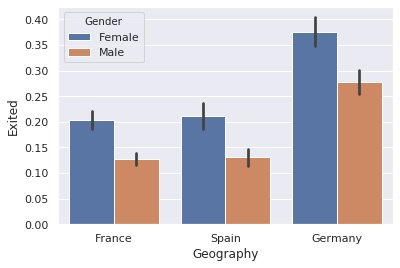

In [16]:
sns.barplot(x='Geography',y='Exited', hue='Gender',data=bankdata)

In [0]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
#print(X[:8,1], '... will be encoded to: ')
from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
#print(X[:8,1])

Pipeline perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.

In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [0]:
X = pipeline.fit_transform(X)

**Divide the data set into training and test sets**

In [0]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [21]:
print(f'train shape: {X_train.shape}, {y_train.shape}')
print(f'test shape: {X_test.shape}, {y_test.shape}')

train shape: (8000, 11), (8000, 1)
test shape: (2000, 11), (2000, 1)


**Neural Network**

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [23]:
# Initializing the ANN
classifier = Sequential()

In [24]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


The amount of nodes (dimensions) in the hidden layer should be the average of your input and output features, i.e if there are 11 dimensions (representing Independent variables Note: Countries still compose only one dimension) and the expected output is looking for a binary output, then, we calculate this to be  (11+1)÷2=6 .

The breakdown of the inputs for the first layer is as follows:

*units: *6 nodes (number of nodes in hidden layer)*. number of nodes are in the next layer.

*activiation: *relu becasue we are in an input layer*. It uses the ReLu activation function for the layer. This is equivalent to  𝑚𝑎𝑥(0,𝑊×𝑥𝑇+𝑏) 

*input_dim: *11 because we span 11 dimensions in our input layer*. This is needed for the first added layer. 

*The subsequent layers's input dimensions can be inferred using the previously added layer's output dimension. The next hidden layer will know what to expect.

In [0]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [0]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

Adding another layer to this model to implement Deep Learning, which is an artificial Neural network with many layers. The second hidden layer also have 6 nodes, just playing with the same arithmetic used to determine the dimensions of the first hidden layer (average of input and output layers)  (11+1)÷2=6 .

In [0]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

Adding the output layer
The breakdown of the inputs for the output layer is as follows:

* activiation: sigmoid becasue we are in an output layer. It uses the Sigmoid activation function for  𝜙 . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

* units: 6 nodes (number of nodes in hidden layer). One can think of this as number of nodes are in the next layer.

* input_dim: 11 because we span 11 dimensions in our input layer. This is needed for the first added layer. The subsequent layers's input dimensions can be inferred using the previously added layer's output dimension. 

In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

If we want more than 2 categories, then change is needed in

* the units parameter to match the desired category count

* the activation field to softmax - Basically a sigmoid function but applied to a dependent variable that has more than 2 categories.

**Compiling the Neural Network**

Basically applying Stochastic Gradient descent on the whole Neural Network. We are Tuning the individual weights on each neuron.

In [29]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


* optimizer: "adam" - algorithm to find the optimal set of weights in the neural networks. An efficeint variation of Stochastic Gradient Descent.

* loss: binary_crossentropy- This is the loss function used within "adam". This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

* metrics: [accuracy] is the accuracy metrics which will be evaluated(minimized) by the model. This is used as accuracy criteria to improve model performance.

**Fitting the Neural Network to our training set**

In [30]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)




Train on 7200 samples, validate on 800 samples
Epoch 1/200





 - 1s - loss: 0.6929 - acc: 0.5964 - val_loss: 0.5337 - val_acc: 0.7937
Epoch 2/200
 - 0s - loss: 0.5115 - acc: 0.7961 - val_loss: 0.4721 - val_acc: 0.7950
Epoch 3/200
 - 0s - loss: 0.4790 - acc: 0.8000 - val_loss: 0.4413 - val_acc: 0.8063
Epoch 4/200
 - 0s - loss: 0.4601 - acc: 0.8078 - val_loss: 0.4159 - val_acc: 0.8187
Epoch 5/200
 - 0s - loss: 0.4422 - acc: 0.8115 - val_loss: 0.3999 - val_acc: 0.8275
Epoch 6/200
 - 0s - loss: 0.4360 - acc: 0.8139 - val_loss: 0.3892 - val_acc: 0.8325
Epoch 7/200
 - 0s - loss: 0.4235 - acc: 0.8235 - val_loss: 0.3790 - val_acc: 0.8425
Epoch 8/200
 - 0s - loss: 0.4179 - acc: 0.8272 - val_loss: 0.3735 - val_acc: 0.8488
Epoch 9/200
 - 0s - loss: 0.4085 - acc: 0.8308 - val_loss: 0.3665 - val_acc: 0.8500
Epoch 10/200
 - 0s - loss: 0.4010 - acc: 0.8332 - val_loss: 0.3606 - val_acc: 0.8525
Epoch 11/200
 - 0s - loss: 0.3978 - acc: 0.8350 - val_loss: 0.3571 - val_acc: 0.8538
Epoch 12/200
 - 0s 

The breakdown of the inputs for compiling is as follows:

* X_train The independent variable portion of the data which needs to be fitted with the model.

* Y_train The output portion of the data which the model needs to produce after fitting.

* batch_size: How often we want to back-propogate the error values so that individual node weights can be adjusted.

* epochs: The number of times we want to run the entire test data over again to tune the weights. This is like the fuel of the algorithm.

* validation_split: 0.2 The fraction of data to use for validation data.

The output network should converge to an accuracy of around 85%

**Testing the NN **-  *Predicting the Test set results*

This shows the probability of a customer leaving given the testing data. 

Each row in X_test corresponds to a row in Y_test

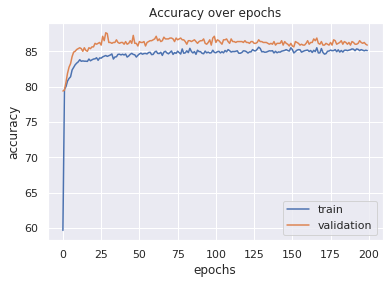

In [31]:
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [32]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.25294662]
 [0.298243  ]
 [0.24798924]
 [0.07395825]
 [0.06605911]]


In [33]:
##Predict the results using 0.5 as a threshold.
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [34]:
##Printing the accuracy score and the Confusion Matrix
from sklearn.metrics import confusion_matrix
confmatrix = confusion_matrix(y_test, y_pred)
print(confmatrix)

[[1550   45]
 [ 235  170]]


In [35]:
print (((confmatrix[0][0]+confmatrix[1][1])*100)/(len(y_test)), '% of test data where customers leaving the bank are classified accurately')

86.0 % of test data where customers leaving the bank are classified accurately
